
<h2>Data Analysis of census Sector Population of 2010 and 2022 Census - Palhoça City, Brazil </h2>

Palhoça is a city from east part of Santa Catarina State and it is located on Florianópolis Metropolitan Region. Palhoça is an economic centre based on services industries and in your territory there are an important natural reserve, that include a huge hydric rosources, forestry, coastal and scenic. These settings makes Palhoça city a strong destinity of migrants in Brazil.

The Brazilian Institute of Geography and Statitics (IBGE as a brazilian acronym) published recently a preview of the population per census sector of all brazilian territory. The results of 2022 Census allow to explore the spatial analysis since there are available the geometries of each census sector.

The definition of IBGE (2024) to census sector is:

> "The Census Sector is the smallest territorial unit, formed by a continuous area, entirely contained in an urban or rural area, with an adequate size for research operations and whose totality covers the entire National Territory, which allows to guarantee complete coverage of the Country."

<h3>Objectives:</h3>

In this notebook I'm going to analyze, compare and create some ways to understand the changes of the data of 2010 and 2022 census from Palhoça City, Brazil.

<h3>Structure of Notebook:</h3>

The notebook is subdivided in this structure:

* Data importing;
* Data analysis;
* Data transforming;
* Data visualization:
    * through the maps;
* 2022 vs. 2010 Statitics.
    * bar chart;
    * scatter plot;



<h3>Data Importing</h3>

First step like was mentioned lately. I'll import the data from a .geoparquet extension file that contains the data.

* Importing data;
* Create DataFrames.

In [1]:
# importing libraries

import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# defining the dataframes:

# data from 2022 census:
df22 = '/kaggle/input/10s-and-20s-brazilian-census-data-palhoa-city/cs_palhoca_22.parquet'

# data from 2010 census:
df10 = '/kaggle/input/10s-and-20s-brazilian-census-data-palhoa-city/cs_palhoca_10.parquet'

<h3>Data Analysis</h3>

* Data analysis:
    * strucutre;
    * type of data;
    * relevant data to analysis;
* partial considerations.


In [3]:
# analyzing the data from 2022 Census through the .read_parquet() method

sa_df22 = gpd.read_parquet(df22)

sa_df22.head(n=5)

# The column with the people number of each census sector is 'v0001'

,CD_SETOR,AREA_KM2,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,...,CD_CONCURB,NM_CONCURB,v0001,v0002,v0003,v0004,v0005,v0006,v0007,geometry
0,421190005000001P,0.285263,4,Sul,42,Santa Catarina,4211900,Palhoça,421190005,Palhoça,...,4205407,Florianópolis/SC,635,301,301,0,2.360595,4.832714,269,"MULTIPOLYGON (((-48.66777 -27.64535, -48.66938..."
1,421190005000002P,0.686197,4,Sul,42,Santa Catarina,4211900,Palhoça,421190005,Palhoça,...,4205407,Florianópolis/SC,488,225,224,1,2.515464,6.185567,194,"MULTIPOLYGON (((-48.66179 -27.64491, -48.66185..."
2,421190005000004P,0.221026,4,Sul,42,Santa Catarina,4211900,Palhoça,421190005,Palhoça,...,4205407,Florianópolis/SC,1132,515,515,0,2.521158,2.895323,449,"MULTIPOLYGON (((-48.66802 -27.65062, -48.66780..."
3,421190005000005P,0.204106,4,Sul,42,Santa Catarina,4211900,Palhoça,421190005,Palhoça,...,4205407,Florianópolis/SC,1126,492,492,0,2.674584,2.375297,421,"MULTIPOLYGON (((-48.67153 -27.65681, -48.67058..."
4,421190005000006P,1.214972,4,Sul,42,Santa Catarina,4211900,Palhoça,421190005,Palhoça,...,4205407,Florianópolis/SC,1130,498,498,0,2.646370,1.873536,427,"MULTIPOLYGON (((-48.66886 -27.65853, -48.66886..."


In [4]:
# analyzing the data type of the GeoParquet file

print(sa_df22.dtypes)

# great! the v0001 column is a int64 type

CD_SETOR        object
AREA_KM2        object
CD_REGIAO       object
NM_REGIAO       object
CD_UF           object
NM_UF           object
CD_MUN          object
NM_MUN          object
CD_DIST         object
NM_DIST         object
CD_SUBDIST      object
NM_SUBDIST      object
CD_MICRO        object
NM_MICRO        object
CD_MESO         object
NM_MESO         object
CD_RGI          object
NM_RGI          object
CD_RGINT        object
NM_RGINT        object
CD_CONCURB      object
NM_CONCURB      object
v0001            int64
v0002            int64
v0003            int64
v0004            int64
v0005           object
v0006           object
v0007            int64
geometry      geometry
dtype: object


In [5]:
# analyzing the data from 2010 Census through the .read_parquet() method

sa_df10 = gpd.read_parquet(df10)

sa_df10.head(n=5)

# The column with the people number of each census sector is 'v0001'

,id,cd_geocodi,tipo,nm_bairro,cd_geocods,cd_geocodd,cd_geocodm,nm_municip,cod_setor,v0001,geometry
0,52765,4.211900e+14,URBANO,None,42119000500,421190005,4211900,PALHOÇA,4.211900e+14,670.0,"MULTIPOLYGON (((-48.65515 -27.65566, -48.65604..."
1,52953,4.211900e+14,URBANO,None,42119000500,421190005,4211900,PALHOÇA,4.211900e+14,678.0,"MULTIPOLYGON (((-48.71135 -27.63933, -48.71141..."
2,52991,4.211900e+14,URBANO,None,42119000500,421190005,4211900,PALHOÇA,4.211900e+14,704.0,"MULTIPOLYGON (((-48.70565 -27.64222, -48.70593..."
3,52898,4.211900e+14,URBANO,Ponte do Imaruim,42119000500,421190005,4211900,PALHOÇA,4.211900e+14,1004.0,"MULTIPOLYGON (((-48.65032 -27.62422, -48.65020..."
4,52938,4.211900e+14,URBANO,None,42119000500,421190005,4211900,PALHOÇA,4.211900e+14,789.0,"MULTIPOLYGON (((-48.69124 -27.64901, -48.69285..."


In [6]:
# analyzing the data type of the GeoParquet file

print(sa_df10.dtypes)

id              object
cd_geocodi     float64
tipo            object
nm_bairro       object
cd_geocods      object
cd_geocodd      object
cd_geocodm      object
nm_municip      object
cod_setor      float64
v0001          float64
geometry      geometry
dtype: object


<H5>Partial Considerations of Data Aanlysis:</h5> 

* 'v0001' column in both data frames is the column with number of residents of each Census Sector;
    * there is a difference of the type of data of 'v0001' between the two data frames. I will normalize on the next step; 
* the column geometry is the column with spatial information;
    * through the geometry column, I can extract the area in Square Meter and doing a analysis across the resitents / area = demographic density.

<h3>Data Transforming</h3>

To normalize all the columns that I'll use in this notebook:
* change de data type of column 'v0001' of sa_df10 fom float to int.

In [7]:
# now I change the type from float to int

sa_df10['v0001'] = sa_df10['v0001'].astype('int')

print(sa_df10.dtypes)

# great! both the data are normalized!

id              object
cd_geocodi     float64
tipo            object
nm_bairro       object
cd_geocods      object
cd_geocodd      object
cd_geocodm      object
nm_municip      object
cod_setor      float64
v0001            int64
geometry      geometry
dtype: object


<h3>Data Visualization</h3>

* Spatial distribution of 2022 vc 2010 Census Sector;
    * partial considerations;
* Statitics of 2022 vc 2010 - Residents and Number of Census Sector


<h4>Spatial distribution of 2022 vc 2010 Census Sector:</h4>

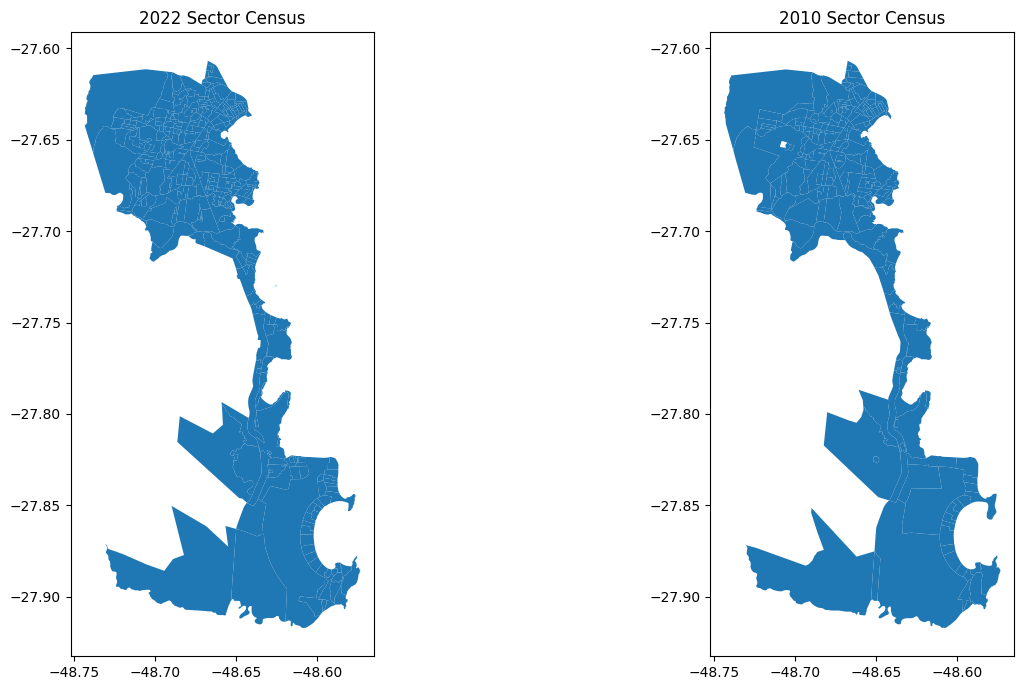

In [8]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot the first GeoDataFrame on the first subplot
sa_df22.plot(ax=axs[0])
axs[0].set_title('2022 Sector Census')

# Plot the second GeoDataFrame on the second subplot
sa_df10.plot(ax=axs[1])
axs[1].set_title('2010 Sector Census')

# Display the plot
plt.tight_layout()
plt.show()

<h5>Partial consideration of spatial distribution of Census Sector on 2022 and 2010</h5>

This visualization bring the insight about the difference between the spatial distribution of Census Sector 2022 and 2010:
* the density of Census Sector turns higher mainly on the north of territory;
* the number of Census Sector, apparently turns higher;
* the number of residents turns higher too?


<h4>Statitics about the Census Sector and Residents of 2022 vs. 2010 census:</h4> 

From the observation of the spatial distribution of Census Sector from 2022 and 2010 Census, let's do some statitics to define the real changing in this period of 12 years:


In [9]:
# let's calculate the number of Census Sector on 2022 and 2010:
len22=sa_df22.shape[0]
print(f'The number of Census Sector of Census 2022 is: {len22}')

len10=sa_df10.shape[0]
print(f'The number of Census Sector of Census 2010 is: {len10}')

# let's calculate the number of residents whose lives in Palhoça on 2022 and 2010:

habsum22 = sa_df22['v0001'].sum()
print(f'The number of residents whose live in Palhoça on 2022 is: {habsum22}')

habsum10= sa_df10['v0001'].sum()
print(f'The number of residents whose lived in Palhoça on 2010 is: {habsum10}')

# the difference:
difference = habsum22 - habsum10
print(f'The people growing in 12 years range is: {difference}')

# the growing percentage is?
percentage = round((difference / habsum10) * 100,2)

print(f'The percentage growing in 12 years range is: {percentage}%')

The number of Census Sector of Census 2022 is: 321
The number of Census Sector of Census 2010 is: 210
The number of residents whose live in Palhoça on 2022 is: 222570
The number of residents whose lived in Palhoça on 2010 is: 136802
The people growing in 12 years range is: 85768
The percentage growing in 12 years range is: 62.69%


<h5>Partial considerations of statitics analytics:</h5>

* Palhoça city was a huge population growing at the last 12 years;
* The number of Census Sector increased too.

<h4>Data Visualization - Scatter Plot</h4>

* From the previously statitics analysis, now I'll plot through a Scatter Plot the variables Sector x Residents:
    * The objective is observe the distribution correlation of this two variables. 
* I'll do a Scatter Plot of Residents x Area:
    * because there is a range from tiny to huge areas, the plot in area variable, will be on logaritmic scale to better represent.

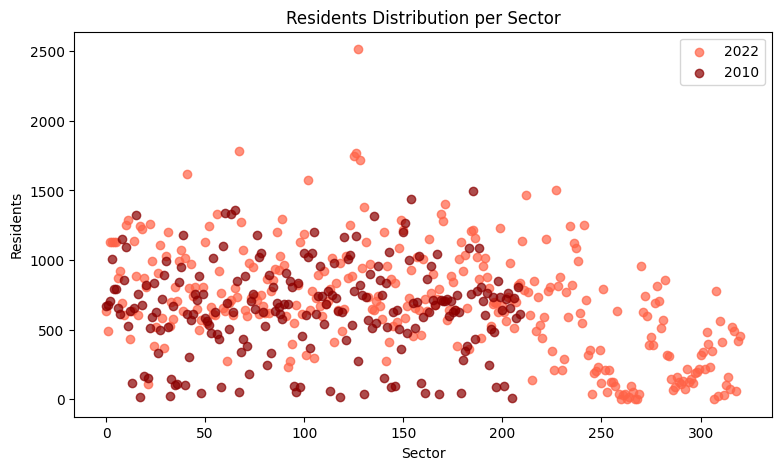

In [10]:
# set the personalized color palette
colors = ['#FF6347', '#8B0000']

# create a figure and axis
fig, ax = plt.subplots(figsize=(9, 5))

# plot v0001 values for 2022
ax.scatter(range(len(sa_df22)), sa_df22['v0001'], label='2022', color=colors[0], alpha=0.7)

# plot v0001 values for 2010
ax.scatter(range(len(sa_df10)), sa_df10['v0001'], label='2010', color=colors[1], alpha=0.7)

# set labels and title
ax.set_xlabel('Sector')
ax.set_ylabel('Residents')
ax.set_title('Residents Distribution per Sector')

# add a legend
ax.legend()

# save and show the plot
plt.savefig('scatter_plot.png')
plt.show()


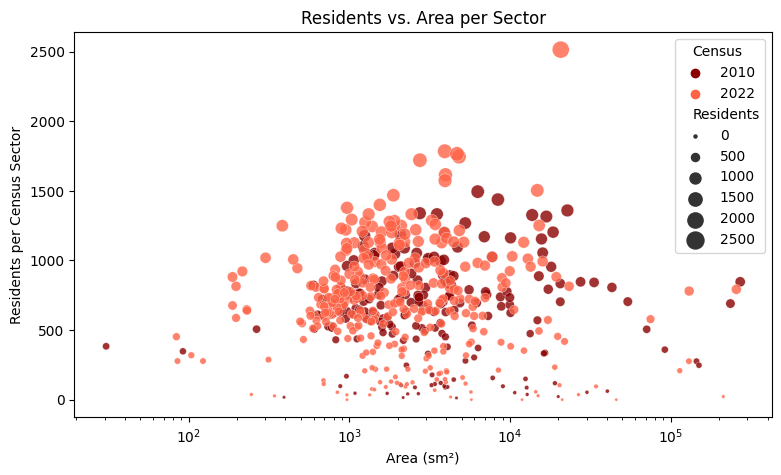

In [11]:
# changing the coordinate reference system of the df to calculate the area on sm²
sa_df10_utm = sa_df10.to_crs('EPSG:31982')
sa_df22_utm = sa_df22.to_crs('EPSG:31982')

# sm2 area
sa_df10_utm['Area_sm2'] = sa_df10_utm['geometry'].area / 100  # converting to sm2
sa_df22_utm['Area_sm2'] = sa_df22_utm['geometry'].area / 100  # converting to sm2

# Add 'Census' column to both DataFrames
sa_df10_utm['Census'] = 2010
sa_df22_utm['Census'] = 2022

# Renaming the column 'v0001' to 'moradores' in both DataFrames
sa_df10_utm.rename(columns={'v0001': 'Residents'}, inplace=True)
sa_df22_utm.rename(columns={'v0001': 'Residents'}, inplace=True)

# Concatenating the DataFrames
sa_df_utm = pd.concat([sa_df10_utm, sa_df22_utm])

# Plotting the scatter plot with the point size based on the 'moradores' column
plt.figure(figsize=(9, 5))
sns.scatterplot(data=sa_df_utm, x='Area_sm2', y='Residents', hue='Census', size='Residents', sizes=(5, 150),
                palette=['#8B0000', '#FF6347'], alpha=0.80, edgecolor='white' )
plt.xscale('log')
plt.xlabel('Area (sm²)')
plt.ylabel('Residents per Census Sector')
plt.title('Residents vs. Area per Sector')
plt.savefig('graph_residents_rispersion_area_2010_2022.png')
plt.show()


<h5>Partial Considerations</h5>

* Logarithmic scale is a good choice to represent the range of the data in a more condensed form;

<h4>Data Visualization - Map Plotting</h4>

To compare the representation of Sector x Population, I'll create some intervals to normalize the data visualization. 

Predefined intervals are useful when there is a specific requirement or standard that needs to be followed, such as when the data needs to be compared against a set of predetermined thresholds or categories.

Using predefined intervals, I ensure that the data is categorized according to specific criteria, making it easier to interpret and compare across different datasets or maps. Thi is useful in situations where consistency in data representation is important, such as in policy-making or reporting.

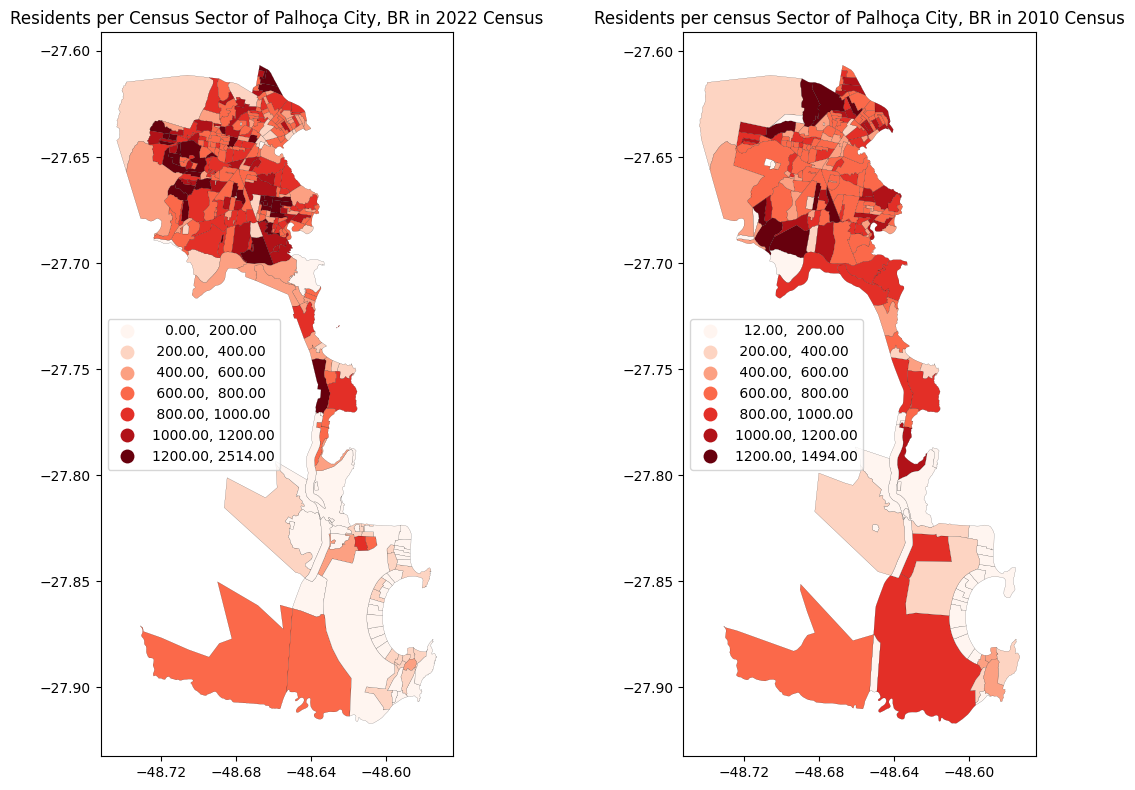

In [12]:

# setting intervals
bins = [200, 400, 600, 800, 1000, 1200]

# subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# map plot 2022
sa_df22.plot(column='v0001', ax=axs[0], legend=True, cmap='Reds', scheme='UserDefined', classification_kwds={'bins': bins}, legend_kwds={'loc': 'center left'}, edgecolor='black', linewidth=0.1)
axs[0].set_title('Residents per Census Sector of Palhoça City, BR in 2022 Census')

# map plot 2010
sa_df10.plot(column='v0001', ax=axs[1], legend=True, cmap='Reds', scheme='UserDefined', classification_kwds={'bins': bins}, legend_kwds={'loc': 'center left'}, edgecolor='black', linewidth=0.1)
axs[1].set_title('Residents per census Sector of Palhoça City, BR in 2010 Census')

# adjusting space between subplots
plt.subplots_adjust(wspace=0.75)

# set number of x-axis y-ticks
for ax in axs:
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))  
    
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))  

# layout adjusting of plot
plt.tight_layout()
plt.savefig('map_plots.png')
plt.show()


<h5>Partial Considerations</h5>

* Through the map representation, it's possible to see the spatial changing of sectors and population during 10 vs 22;
* On the north of territory of Palhoça, was the place that had mor changes:
    * new boundaries of sectores were defined;
    * ne number of residents of each sector were increased;


<h3>Final Considerations</h3>

* Use .geoparquet file format instead a classic .shp, showed be more efficient;

* Palhoça was a city if a huge population growing, where were increasing more of 85k people in your territory;

* With the data disponibilized by IBGE from 2022 census until now (04/04/24) there are possible to do some analys on way to compare with 2010 census;

* The scatter plot of Area x Residents using a logaritimic scale to represents the area data, show to be a smart way to represent a wide range values of a specific variable;

* Use maps to visualize data, are always good to understand changes of spatial distribution;

